In [1]:
import numpy as np
import numpy.linalg as la

print('Classifying flowers based on a well known dataset')
print('2 classifications: iris setosa vs other, and iris virginica vs other')
#load the data
data = np.loadtxt('iris.csv', delimiter=',', dtype='object')
matX = data[:,:-1].astype(float).T
#np.shape(matX) = 4, 150
lmap = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
#convert labels to ints 0, 1, 2
vecY_ = np.vectorize(lmap.get)(data[:,-1])
def trainLDA(classVSrest):
    theLabel = data[np.where(vecY_ ==classVSrest)[0][0], 4]
    print("\nclassifying "+theLabel+ " vs rest")
    # 1 where vecY==0 and -1 elsewhere
    vecY = np.where(vecY_==classVSrest, +1, -1)
    # we want to distinguish iris setosa vs rest
    matX1 = matX [:, vecY==+1]
    matX2 = matX [:, vecY==-1]
    #calculating means along the 2nd dimension
    mu1_ = np.mean(matX1, axis=1)
    mu2_ = np.mean(matX2, axis=1)
    #covariance
    matC1 = np.cov(matX1)
    matC2 = np.cov(matX2)
    #np.shape(matC2) = (4,4)
    SW = matC1 + matC2
    #np.shape(SW) = (4,4)
    a = np.linalg.inv(SW).dot(mu1_-mu2_)
    print("a = "+str(a))
    #these are components that go towards calculating the bias
    mu1 = a.T.dot(mu1_)
    mu2 = a.T.dot(mu2_)
    v1 =  a.T.dot(matC1).dot(a)
    v2 =  a.T.dot(matC2).dot(a)
    #fraction 1, fraction 2
    fr1 = (v2*mu1-v1*mu2)/(v1-v2)
    fr2 = (v1*mu2-v2*mu1+2*v1*v2*np.log(v2/v1))/(v1-v2)
    x1 = -fr1 + np.sqrt(fr1**2 - fr2)
    x2 = -fr1 - np.sqrt(fr1**2 - fr2)
    if min(mu1, mu2) <= x1 and x1 <= max(mu1, mu2):
        b = x1
    else:
        b = x2
    print("b = "+str(b))
    yOut = np.sign(matX.T.dot(a)-b)
    accuracy = sum(vecY==yOut)/len(vecY)
    print("accuracy = "+str(accuracy))

trainLDA(0)
trainLDA(2)
print("In conclusion, iris setose can be identified perfectly and the detection of iris virginica is at chance level.")

Classifying flowers based on a well known dataset
2 classifications: iris setosa vs other, and iris virginica vs other

classifying Iris-setosa vs rest
a = [ 1.34918684  5.31745602 -6.10032312 -1.88621694]
b = 0.12329304665642482
accuracy = 1.0

classifying Iris-virginica vs rest
a = [-0.43906752  1.04301529  0.50953746  2.68190443]
b = 0.3470871999868059
accuracy = 0.3333333333333333
In conclusion, iris setose can be identified perfectly and the detection of iris virginica is at chance level.


In [2]:
import numpy as np
import numpy.linalg as la
import numpy.random as rnd
import matplotlib.pyplot as plt

print('Testing the classifiyer on testing data that is independent of training data:\n')
data = np.loadtxt('iris.csv', delimiter=',', dtype='object')
matX = data[:,:-1].astype(float).T
#np.shape(matX) = 4, 150
lmap = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
#convert labels to ints
vecY_ = np.vectorize(lmap.get)(data[:,-1])
def trainTestLDA(classVSrest, nSplits):
    theLabel = data[np.where(vecY_ ==classVSrest)[0][0], 4]
    print("\nclassifying "+theLabel+ " vs rest")
    # 1 where vecY==0 and -1 elsewhere
    vecY = np.where(vecY_==classVSrest, +1, -1)
    # we want to distinguish iris setosa vs rest
    matX1 = matX [:, vecY==+1]
    matX2 = matX [:, vecY==-1]

    n1 = int(np.round(np.shape(matX1)[1]*2/3))
    n2 = int(np.round(np.shape(matX2)[1]*2/3))
    n1tst = np.shape(matX1)[1]-n1
    n2tst = np.shape(matX2)[1]-n2
    accuracy = np.zeros((1, nSplits))
    #create nSplits different splits
    for i in range(nSplits):
        shuffled1 = rnd.permutation(np.shape(matX1)[1])
        shuffled2 = rnd.permutation(np.shape(matX2)[1])
        X1trn = matX1[:,shuffled1[:n1]]
        X2trn = matX2[:,shuffled2[:n2]]
        Xtst = np.concatenate((matX1[:,shuffled1[n1:]], matX2[:,shuffled2[n2:]]),axis=1)
        #this is not pretty but have to create labels for test data
        Ytst=np.concatenate(([1]*n1tst, [-1]*n2tst))
        #calculating means along 2nd dimension
        mu1_ = np.mean(X1trn, axis=1)
        mu2_ = np.mean(X2trn, axis=1)
        #covariance
        matC1 = np.cov(X1trn)
        matC2 = np.cov(X2trn)
        #np.shape(matC2) = (4,4)
        SW = matC1 + matC2
        #np.shape(SW) = (4,4)
        a = np.linalg.inv(SW).dot(mu1_-mu2_)
        #this goes towards calculating the bias
        mu1 = a.T.dot(mu1_)
        mu2 = a.T.dot(mu2_)
        v1 =  a.T.dot(matC1).dot(a)
        v2 =  a.T.dot(matC2).dot(a)
        #fraction 1, fraction 2
        fr1 = (v2*mu1-v1*mu2)/(v1-v2)
        fr2 = (v1*mu2-v2*mu1+2*v1*v2*np.log(v2/v1))/(v1-v2)
        x1 = -fr1 + np.sqrt(fr1**2 - fr2)
        x2 = -fr1 - np.sqrt(fr1**2 - fr2)
        if min(mu1, mu2) <= x1 and x1 <= max(mu1, mu2):
            b = x1
        else:
            b = x2
        print("b = "+str(b))
        yOut = np.sign(Xtst.T.dot(a)-b)
        accuracy[0][i] = sum(Ytst==yOut)/len(Ytst)
    accuracy_mean = np.mean(accuracy)
    print("accuracy is "+str(accuracy_mean)+"\n("+str(nSplits)+ " splits)")
# AUFG 3.5
trainTestLDA(0, 10)
trainTestLDA(2, 10)
print("The performances from above are still the same. The issue lies in the data")


Testing the classifiyer on testing data that is independent of training data:


classifying Iris-setosa vs rest
b = 0.08643581678382617
b = 0.10288538291549187
b = 0.08567932782259291
b = 0.13689586124310438
b = 0.20368424313235778
b = 0.15392943961920835
b = 0.23502609296524213
b = 0.01402776105713599
b = 0.15648452901071508
b = 0.11337438319127102
accuracy is 0.9559999999999998
(10 splits)

classifying Iris-virginica vs rest
b = 0.3508017008623625
b = 0.3204794166637548
b = 0.3395849390605088
b = 0.3393764394137291
b = 0.33059446141582427
b = 0.34337311380335045
b = 0.36324774714806374
b = 0.3713330904896335
b = 0.35475592933925704
b = 0.3645854138971707
accuracy is 0.33999999999999997
(10 splits)
The performances from above are still the same. The issue lies in the data


Using principal component analysis (PCA) and singular value decomposition (SVD) to visualize the data in 2d.
Setosa ist always easier to identify than the others. all versions probably score above chance, but only some actually yield good results ([0,1], [1,2] and [1,3]).


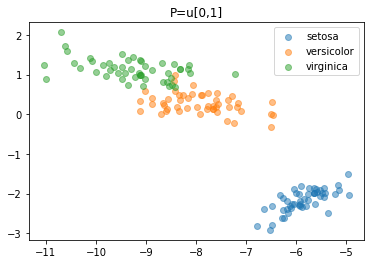

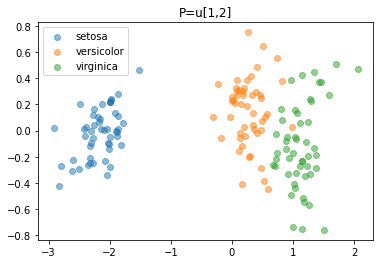

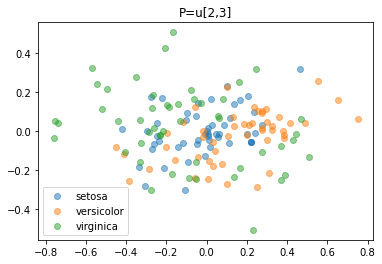

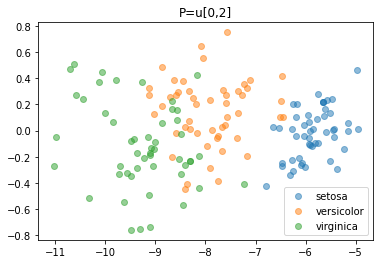

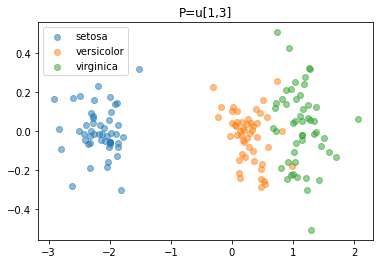

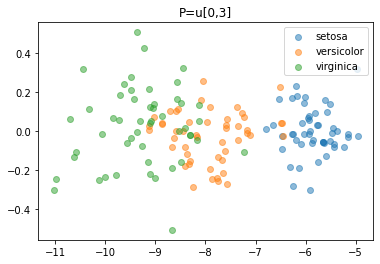

In [3]:
import numpy as np
import numpy.linalg as la
import numpy.random as rnd
import matplotlib.pyplot as plt

print('Using principal component analysis (PCA) and singular value decomposition (SVD) to visualize the data in 2d.')
data = np.loadtxt('iris.csv', delimiter=',', dtype='object')
matX = data[:,:-1].astype(float).T
matU, svals, matVt = la.svd(matX)
def plotProjections(inds):
    P = matU[:,inds]
    Z = P.T.dot(matX)
    lmap = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
    #labels in ints umwandeln 0, 1, 2
    vecY = np.vectorize(lmap.get)(data[:,-1])
    plt.scatter(Z[0,np.where(vecY==0)],Z[1,np.where(vecY==0)], alpha=.5, label='setosa')
    plt.scatter(Z[0,np.where(vecY==1)],Z[1,np.where(vecY==1)], alpha=.5, label='versicolor')
    plt.scatter(Z[0,np.where(vecY==2)],Z[1,np.where(vecY==2)], alpha=.5, label='virginica')
    plt.title('P=u[{},{}]'.format(inds[0], inds[1]))
    plt.legend()
    plt.show()

pltInds = [[0,1],[1,2], [2,3], [0,2],[1,3],[0,3]]
for p in pltInds:
    plotProjections(p)

print("Setosa ist always easier to identify than the others. all versions probably score above chance, but only some actually yield good results ([0,1], [1,2] and [1,3]).")